<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

Learning how to the **Objected-Oriented (OO)** interface to use the `matplotlib` package in a more nuanced and effective way. 

# 1 Some nomenclature

**Figure**: Refers to the entire 'canvas' that we will plot the graph on. 
**Axis**: Refers to the fixed horizontal and vertical lines that help us (human and Python interpreter alike) to plot the necessary coordinates. A single figure can have multiple axes. 

# 2 Comparing the two ‘dialects’

### pyplot Interface

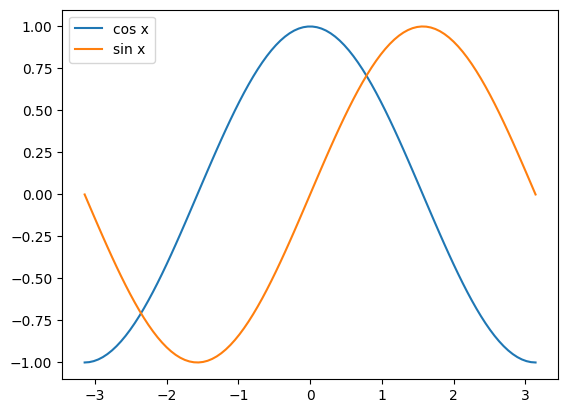

In [1]:
from matplotlib import pyplot as plt
import numpy as np
x=np.linspace(-np.pi, np.pi, num=100) #generate a list of 100 numbers in an open interval between -$/pi$ to +$/pi$
cos_x=np.cos(x)
sin_x=np.sin(x)
#so we have our data
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()



### OO Interface

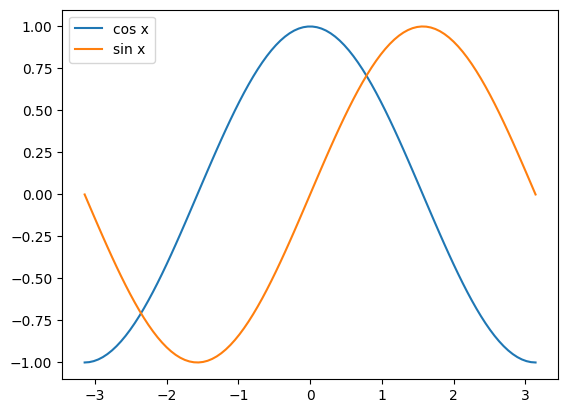

In [2]:
from matplotlib import pyplot as plt
import numpy as np
x=np.linspace(-np.pi, np.pi, num=100) #generate a list of 100 numbers in an open interval between -$/pi$ to +$/pi$
cos_x=np.cos(x)
sin_x=np.sin(x)
#so we have our data
fig, ax=plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()

Here is a breakdown of the code statements and functions used in the OO interface code:
1. `subplots()` - basic function to instruct the interpreter to create a Matplotlib a basic figure and axis. The obtained figure and axis can be named using any variable - for readability purposed they have been called `fig` and `ax` respectively. 
2. This function offers greater degrees of freedom than the basic `pyplot` functions. 


# 3 What is OO ax, really?

Let us first create a basic figure of two horizontal axes, one for cos x and the other for sin x.

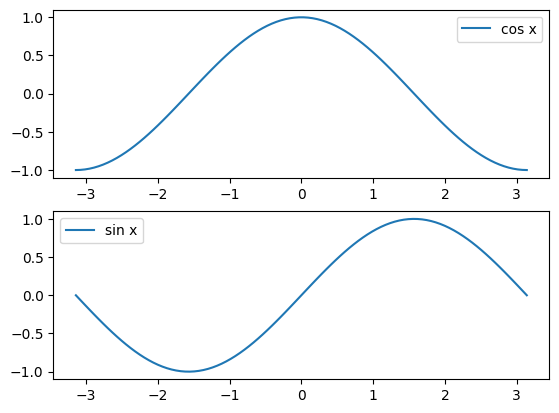

In [4]:
from matplotlib import pyplot as plt
fig, ax=plt.subplots(nrows=2, ncols=1)
#creating our data set
import numpy as np
x=np.linspace(-np.pi, np.pi, num=100) #generate a list of 100 numbers in an open interval between -$/pi$ to +$/pi$
cos_x=np.cos(x)
sin_x=np.sin(x)
ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')
ax[0].legend()
ax[1].legend()

1. We need two horizontal axes and the same single vertical axis - hence, we use the `subplots()` function with the arguments `nrows=2` and `ncols=1`.
2. Here are the details about `ax` as a code snippet: 

![](whatisax.png)

- Type: `ax` is a `NumPy` array. 
- Shape: Has two items
- `ax` contains Matplotlib axes. 


# 4 A complete OO example
Here we will create a better version of a different plot. 

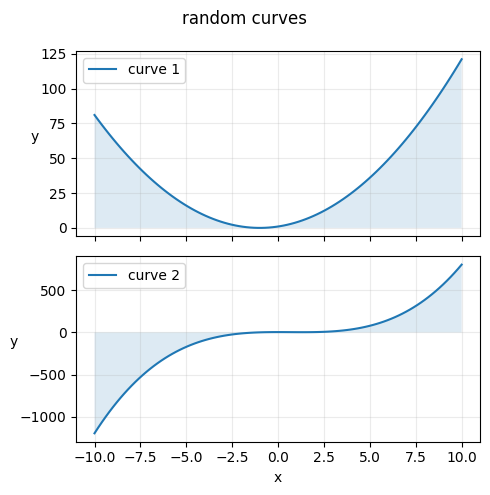

In [11]:
from matplotlib import pyplot as plt
import numpy as np
fig, ax=plt.subplots(nrows=2, ncols=1, figsize=(5,5), sharex=True)
#creating our data set
x=np.linspace(-10, 10, 100)
y1=x**2+2*x+1 #creating a quadratic curve
y2=x**3-2*x**2+4 #creating a cubic curve
ax[0].plot(x, y1, label='curve 1') 
ax[1].plot(x, y2, label='curve 2')
ax[0].fill_between(x, 0, y1, alpha=0.15) 
#fill between helps us to shade within the graphed portion
ax[1].fill_between(x, 0, y2, alpha=0.15)
for a in ax: # a for loop is used to access all the values within the ax NumPy array
    a.legend() #creating a legend
    a.grid(alpha=0.25) #creating a grid with a depth of 0.25
    a.set_ylabel('y', rotation=0) #naming the y-axis of each curve

ax[1].set_xlabel('x') 
fig.suptitle('random curves') #setting the 'super title' or the main title of the figure
fig.tight_layout()

# 5 Multiple rows and columns

### Using ax

The following code is a very simple 'structural' one that will help us to figure out how to create multiple axes (i.e. rows and columns) within the same figure. 

(2, 2)


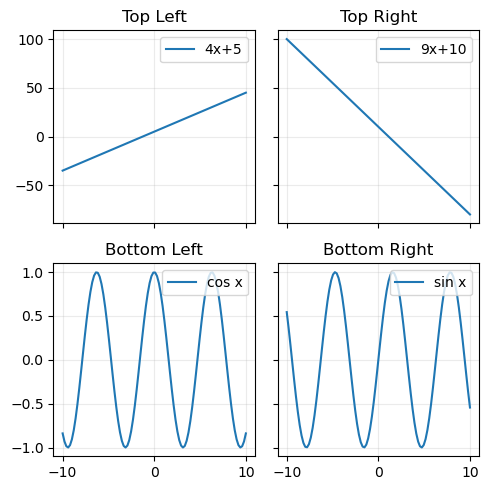

In [6]:
from matplotlib import pyplot as plt
import numpy as np
fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(5,5), sharex='col', sharey='row')
#seeing 'ax' shape to understand what sort of an array it is
print(ax.shape)
#variables to access the different elements of 'ax':
top_left, top_right, bottom_left, bottom_right=ax.flatten() 
#the flattens() function takes a 2D array like 'ax' and flattens it to a '1D array'
#setting the name for each axis:
top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')
#creating our data set
x=np.linspace(-10, 10, 100)
y1=4*x+5
y2=-9*x+10
y3=np.cos(x)
y4=np.sin(x)
top_left.plot(x, y1, label='4x+5')
top_right.plot(x, y2, label='9x+10')
bottom_left.plot(x, y3, label='cos x')
bottom_right.plot(x, y4, label='sin x')
for a in ax.flatten():
    a.legend(loc='upper right')
    a.grid(alpha=0.25)
plt.tight_layout()

Some important notes about the code: 
1. You can see that the ax.shape attribute returns a value of `2,2` - i.e. in this code, `ax` is a 2x2 NumPy array. 
2. Therefore, its elements can be accessed like that of any other NumPy array (in case we wish to change attributes of an individual axis) as follows:  `ax[0,0]`, `ax[0,1]` and so on. 
3. While creating the figure using `subplot` - we have used two extra arguments: `sharex` and `sharey`.
    1. These arguments allows the interpreter to create graphs that are auto-scaled - i.e. the min/max values, along with the unit size (i.e. the distance between two consecutive points on the x and y axes) are all the same for all 4 graphs in this case. 
    2. The arguments can have three very commonly used values:
        1. `True` - Makes **all** axes have the same range
        2. `col` - Uses the same range for all the columns 
        3. `row` - Uses the same range for all the rows
4. There can be two ways to access all the elements of the `ax` NumPy array:
    1. Using an iterative structure to access its elements using its specific index, if we want to change certain aspects of a particular axis. 
    2. Using an iterative structure to access its elements after implementing the `flatten()` function so that the same can be implemented to all the axes together. The `flatten()` function converts (or 'flattens') the multi-dimensional `ax` to a 1D array which can be accessed easily. 

# 6 Other useful plots

Before we proceed further, we first have to obtain particular data-sets in order to create the graphs. 

In [ ]:
import numpy as np
def get_data():
    data={}
    filename='sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['ALL']=np.loadtxt(filename, skiprows=1) 
    #under row 'ALL' we obtain the text from the mentioned file and skip the row with the heading 
    filename='sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS']=np.loadtxt(filename, skiprows=1)
    #under row 'NUS' we obtain the text from the mentioned file and skip the row with the heading 
    return data

## 6.1 Histograms

### Data

_already downloaded - ensure that the files are the same working directory!_

### The histogram

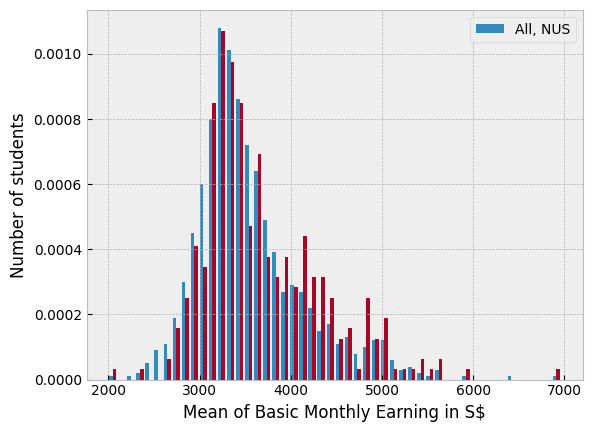

In [1]:
#using the helper function
from matplotlib import pyplot as plt
import numpy as np
def get_data(): #helper function 
    data={}
    filename='sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['ALL']=np.loadtxt(filename, skiprows=1) 
    #under row 'ALL' we obtain the text from the mentioned file and skip the row with the heading 
    filename='sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS']=np.loadtxt(filename, skiprows=1)
    #under row 'NUS' we obtain the text from the mentioned file and skip the row with the heading 
    return data

plt.style.use('bmh') 
data=get_data()
plt.hist([data['ALL'], data['NUS']], bins=50, label=['All, NUS'], density=True) 
#value of the argument 'bins' specified the number of divisions/bars that need to be created
plt.xlabel("Mean of Basic Monthly Earning in S$")
plt.ylabel("Number of students")
plt.legend()

## 6.2 Scatter plots

They use discrete values of `x` and `y` coordinates to create a plot. Using the same dataset as above, we must generate a list of 'x' values in order to create the plot. 

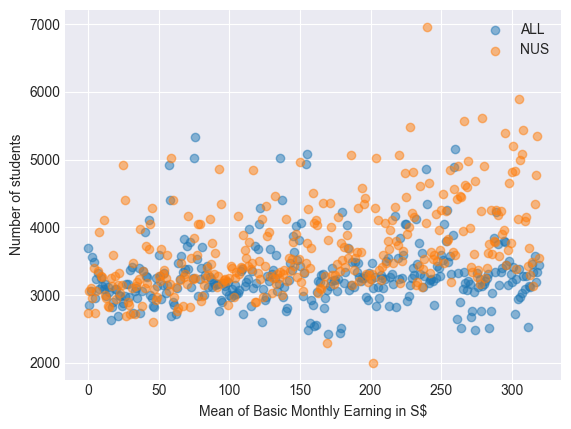

In [2]:
from matplotlib import pyplot as plt
import numpy as np
def get_data(): #helper function 
    data={}
    filename='sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['ALL']=np.loadtxt(filename, skiprows=1) 
    #under row 'ALL' we obtain the text from the mentioned file and skip the row with the heading 
    filename='sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS']=np.loadtxt(filename, skiprows=1)
    #under row 'NUS' we obtain the text from the mentioned file and skip the row with the heading
    # Ensure that both datasets have the same length
    min_length = min(len(data['ALL']), len(data['NUS']))
    data['ALL'] = data['ALL'][:min_length]
    data['NUS'] = data['NUS'][:min_length] 
    return data

plt.style.use('seaborn-v0_8-darkgrid') 
data=get_data()
for label, numbers in data.items():
    x=range(len(numbers))
    y=numbers
    plt.scatter(x, y, label=label, alpha=0.5)
plt.xlabel("No. of students")
plt.ylabel("Mean of Basic Earning in S$")
plt.legend()


## 6.3 Bar charts

Given the nature of the previously used data sets, they cannot be used in this case to explain the nature of implementation of a bar chart (unless we modify the data a little bit and process it on the basis of frequency of the mean income in S$). Therefore, in this case we shall be using some dummy data, in order to explain the creation of a bar chart. 

Text(0, 0.5, 'Voters in millions')

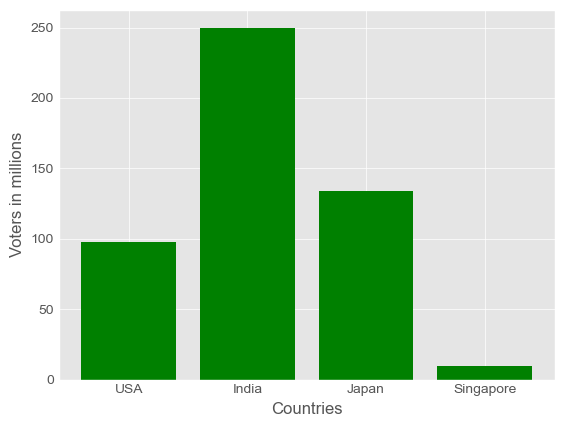

In [13]:
from matplotlib import pyplot as plt 
import numpy as np
voters={'USA':98, 'India':250, 'Japan':134, 'Singapore':10}
countries=list(voters.keys())
nums=list(voters.values())
plt.style.use('ggplot')
plt.bar(countries, nums, color='green') #barh() can be used to create a horizontal bar chart
plt.xlabel('Countries')
plt.ylabel('Voters in millions') 

## 6.4 Pie charts

_reusing the data from the dummy dictionary above_

Text(0.5, 1.0, 'Percentage of voters (inaccurate)')

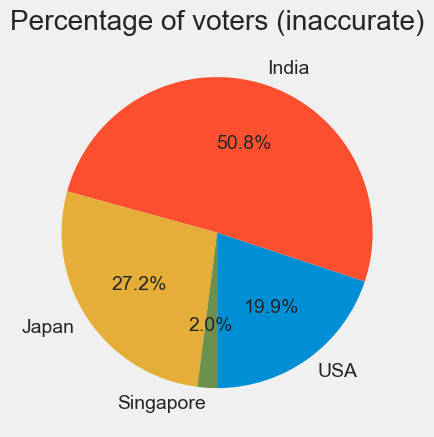

In [19]:
from matplotlib import pyplot as plt 
import numpy as np
voters={'USA':98, 'India':250, 'Japan':134, 'Singapore':10}
countries=list(voters.keys()) #autopct='%1.1f%%', #how to format the display percentage
nums=list(voters.values())
plt.style.use('fivethirtyeight')
plt.pie(nums, 
        labels=countries,
        autopct='%1.1f%%',
        startangle=-90)
plt.title("Percentage of voters (inaccurate)") 